In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [2]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    pred = est.predict_proba(X_pred)[:, 1]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    plt.show()

In [3]:
def plot_data(X, y):
    positive_indices = y.index[y == 1]
    negative_indices = y.index[y == 0]
    
    plt.scatter(X.iloc[positive_indices, 0], X.iloc[positive_indices, 1], marker='x', c='green')
    plt.scatter(X.iloc[negative_indices, 0], X.iloc[negative_indices, 1], marker='+', c='red')
    
    plt.show()

In [30]:
X, y = make_classification(n_samples = 100, n_features = 2, n_classes = 2, n_informative = 2, n_redundant = 0)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
cls = MLPClassifier(activation='logistic', max_iter=1000, alpha=0.001)

In [33]:
cls.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, max_iter=1000)

In [34]:
y_pred = cls.predict(X_train)

In [35]:
accuracy_score(y_train, y_pred)

0.9

In [36]:
y_pred_test = cls.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred_test)

0.75

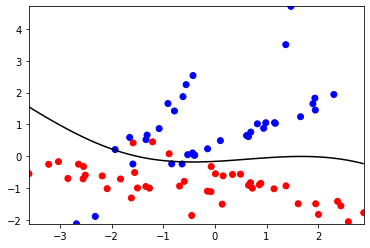

In [38]:
ax = plt.gca()
ax.scatter(X_train[:,0], X_train[:,1], c=(y_train == 1), cmap=cm_bright)
plot_surface(cls, X_train[:, 0], X_train[:, 1], ax=ax)

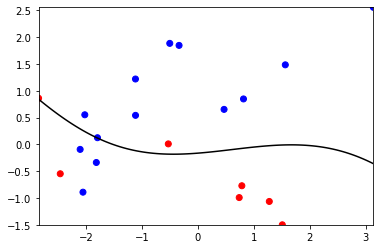

In [39]:
ax = plt.gca()
ax.scatter(X_test[:,0], X_test[:,1], c=(y_test == 1), cmap=cm_bright)
plot_surface(cls, X_test[:, 0], X_test[:, 1], ax=ax)

In [40]:
data = pd.read_csv('sats.csv')
X_sats, y_sats = data[['exam1', 'exam2']], data['submitted']

In [41]:
cls = MLPClassifier(activation='logistic', max_iter=1000)

In [42]:
cls = cls.fit(X_sats, y_sats)

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
accuracy_score(y_sats, cls.predict(X_sats))

0.99

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


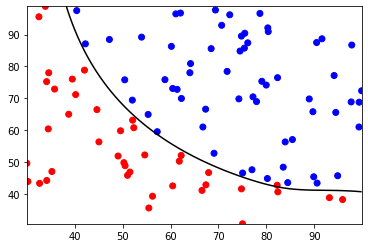

In [44]:
ax = plt.gca()
ax.scatter(X_sats.iloc[:,0], X_sats.iloc[:,1], c=(y_sats == 1), cmap=cm_bright)
plot_surface(cls, X_sats.iloc[:, 0], X_sats.iloc[:, 1], ax=ax)

In [51]:
data = pd.read_csv('tests.csv')
X_tests, y_tests = data[['test1', 'test2']], data['passed']

In [52]:
cls = MLPClassifier(activation='relu', 
                    max_iter=2000,
                    early_stopping=True, 
                    tol=1e-8, 
                    n_iter_no_change=20, 
                    learning_rate_init=0.1, 
                    hidden_layer_sizes=(50,10,5))

In [53]:
cls = cls.fit(X_tests.values, y_tests.values)

In [54]:
accuracy_score(y_tests.values, cls.predict(X_tests.values))

0.7542372881355932

In [55]:
cls.n_iter_

45

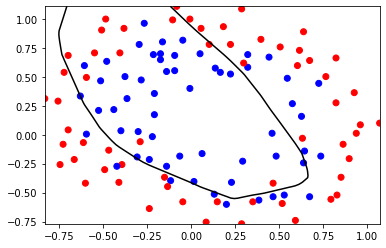

In [56]:
ax = plt.gca()
ax.scatter(X_tests.iloc[:,0], X_tests.iloc[:,1], c=(y_tests == 1), cmap=cm_bright)
plot_surface(cls, X_tests.iloc[:, 0], X_tests.iloc[:, 1], ax=ax)